# **Ayudantía 6 - Visualización Complejas**
## Data Visualization
**Ayudante:** Gabriel Burgos  
**Fecha:** Abril 2025  
 _Universidad de Concepción_

---
__Este workshop se enfoca en la creación de visualizaciones relevantes utilizando datos de precipitaciones en Chile.__

# 💻 Workshop 5

## Data Visualization

[Fuente: Banco Central - IMACEC](https://www.bcentral.cl/web/banco-central/areas/estadisticas/imacec)

---

##### 1. Grafique la evolución mensual del IMACEC total y compárelo con el IMACEC no minero.

In [ ]:
# Tu código aquí

###### Solución de la pregunta 1

In [127]:
# Lectura
import pandas as pd
from unidecode import unidecode # Para neutralizar tildes

df = pd.read_excel('data/ws5/IMACEC.xlsx', 
                   header=7, # Para comenzar en la tabla real
                   skipfooter=11, # Para no leer las ultimas filas
                   skiprows=[15]) # Para saltarse la linea de separación

# Corrigiendo nombres de Columnas
## Función de corrección
def corregir_nombre(nombre:str):
    nombre = unidecode(nombre) # Neutraliza tildes
    nombre = nombre.lower() # A minúsculas
    nombre = nombre[:-4] if '(' in nombre else nombre # Quita ()
    return nombre
## Aplicando sobre columnas y sobreescribiendo
df.columns = [corregir_nombre(col) for col in df.columns]
## Corrigiendo imacec no minero
df = df.rename(columns={'imacecnominero':'imacec no minero'})

# Separando tablas
df_anual = df[:7] # totales anuales
df = df[7:].reset_index(drop=True)
# Rellenando años faltantes
df['periodo'] = df['periodo'].ffill() # Rellena años
# Mapeando meses
meses = {'ene':'01', 
         'feb':'02', 
         'mar':'03', 
         'abr':'04', 
         'may':'05', 
         'jun':'06', 
         'jul':'07', 
         'ago':'08', 
         'sep':'09',
         'oct':'10', 
         'nov':'11', 
         'dic':'12',
         }
df['unnamed: 1'] = df['unnamed: 1'].map(meses)
# Corrigiendo columna periodo
df['periodo'] = df['periodo'].astype(int).astype(str) + '-' + df['unnamed: 1'] # Union
df['periodo'] = pd.to_datetime(df['periodo'], format='%Y-%m') # Pasar a fecha
df.drop(columns=['unnamed: 1'], inplace=True) # Borrando columna de meses anterior
df

,periodo,mineria,industria,resto de bienes,total produccion de bienes,comercio,servicios,total imacec a costo,impuestos a los produ,total imacec,imacec no minero
0,2018-01-01,96.544383,99.659868,113.911467,104.802668,103.572177,90.811778,97.127609,92.246718,96.638285,96.647744
1,2018-02-01,92.004524,93.536219,123.006377,105.577274,91.074985,85.034673,92.967564,91.191314,92.789489,92.868564
2,2018-03-01,100.009399,105.249636,124.885767,112.064054,103.144904,101.562300,105.458791,103.186103,105.230947,105.756946
3,2018-04-01,91.025631,105.716717,108.275297,102.592350,102.842542,102.391344,102.510368,96.960566,101.953983,103.054863
4,2018-05-01,100.207610,105.383899,94.575453,99.324228,103.752615,103.168474,101.864986,100.458493,101.723981,101.876734
...,...,...,...,...,...,...,...,...,...,...,...
83,2024-12-01,108.418667,115.805875,154.010453,126.073334,146.429244,122.053193,126.271106,126.046950,126.264046,129.087876
84,2025-01-01,84.576177,112.006172,121.737843,104.706148,140.775390,111.248547,111.583086,105.704263,110.994504,115.199725
85,2025-02-01,75.558851,104.813526,124.182367,100.308134,123.202179,104.356716,104.762168,99.612460,104.247666,108.847910
86,2025-03-01,89.729307,115.197621,127.716284,109.645557,132.985923,125.136822,119.862898,114.358242,119.314147,124.033694


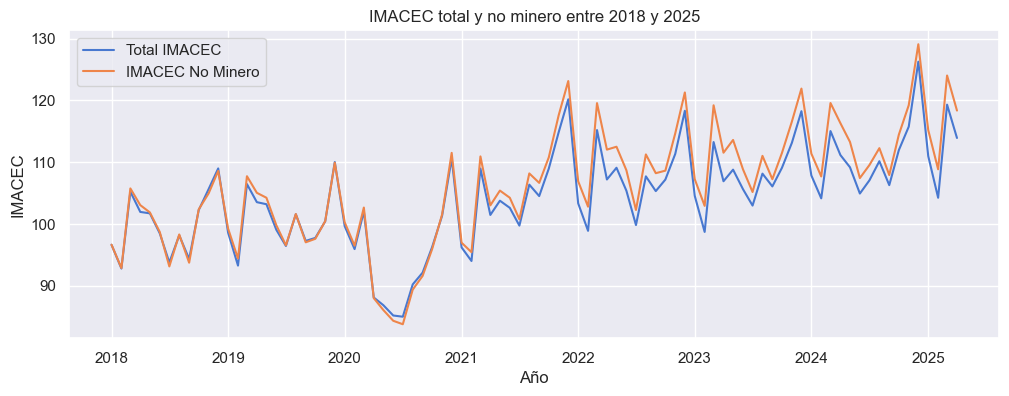

In [151]:
# Solución de pregunta 1
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('notebook')
sns.set_palette(palette='muted')

# FIGURA

## Lienzo
plt.figure(figsize=(12,4))
## Gráficos de Linea
### Total imacec
sns.lineplot(data=df, 
             x='periodo', 
             y='total imacec', 
             label='Total IMACEC',
             )
### Imacec no minero
sns.lineplot(data=df, 
             x='periodo', 
             y='imacec no minero', 
             label='IMACEC No Minero') # No Miner
# Mostrar
plt.title('IMACEC total y no minero entre 2018 y 2025')
plt.xlabel('Año')
plt.ylabel('IMACEC')
plt.show()

##### 2. Compare en un gráfico de barras el IMACEC del año 2023 y 2024 para todas las industrias.

In [124]:
# Tu código aquí
df.columns

Index(['periodo', 'mineria', 'industria', 'resto de bienes',
       'total produccion de bienes', 'comercio', 'servicios',
       'total imacec a costo', 'impuestos a los produ', 'total imacec',
       'imacec no minero'],
      dtype='object')

###### Solución de la pregunta 2

In [143]:
# Solución de pregunta 2

# Quitando columna no útil en periodo df_anual
df2 = df_anual.drop(columns='unnamed: 1')
df2['periodo'] = df2['periodo'].astype(int)
# A tidy
df2_tidy= df2.melt(id_vars='periodo', var_name='industria', value_name='imacec')
# Solo industrias
industrias = ['mineria',
              'industria',
              'resto de bienes',
              'comercio',
              'servicios']
df_industrias = df2_tidy[df2_tidy['industria'].isin(industrias)]
# Solo 2023 y 2024
df_industrias = df_industrias[df_industrias['periodo'] >= 2023]
df_industrias

,periodo,industria,imacec
5,2023,mineria,85.957649
6,2024,mineria,90.396684
12,2023,industria,101.967863
13,2024,industria,104.770584
19,2023,resto de bienes,104.926930
20,2024,resto de bienes,108.324675
33,2023,comercio,112.281047
34,2024,comercio,118.043537
40,2023,servicios,116.116018
41,2024,servicios,118.408636


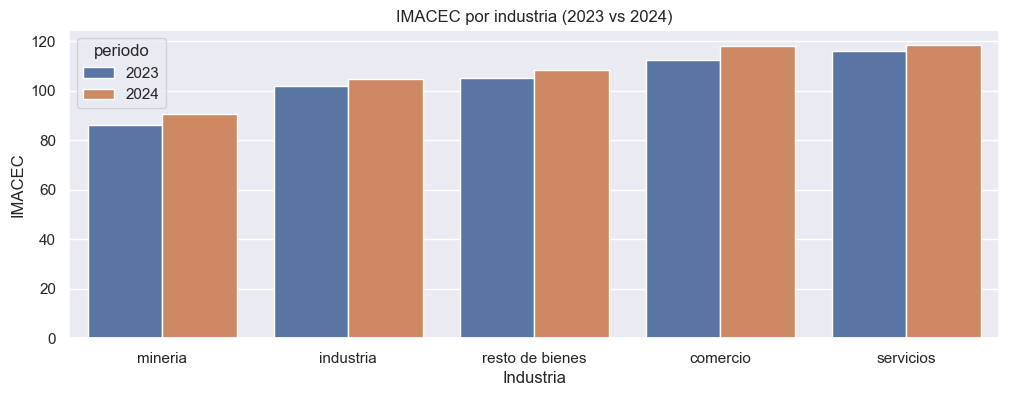

In [158]:
# FIGURA
plt.figure(figsize=(12,4))
## Gráfico de barras
sns.barplot(data=df_industrias,
            x='industria',
            y='imacec',
            hue='periodo',
            palette='deep')
## Mostrar
plt.title('IMACEC por industria (2023 vs 2024)')
plt.xlabel('Industria')
plt.ylabel('IMACEC')
plt.show()

##### 3. Grafique la tasa de variación del IMACEC con respecto al mes anterior.

###### Solución de la pregunta 3

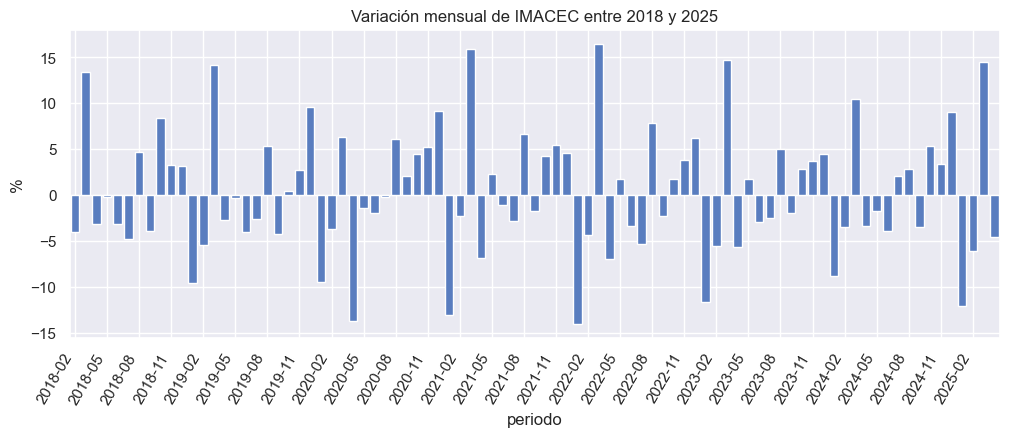

In [ ]:
# Solución de pregunta 3
import numpy as np

# Columna de Variacion
df['variacion'] = df['total imacec'].pct_change() * 100
df3 = df.copy()
df3['periodo'] = df3['periodo'].astype(str).apply(lambda x: x[:-3])
df3['año'] = df3['periodo'].apply(lambda x: x[:4])

# FIGURA
plt.figure(figsize=(12,4))

# Gráfico
sns.barplot(data=df3[1:], # Me salto primer mes
            x='periodo',
        	y='variacion')
# Configuración
xticks = np.arange(0, len(df3[1:]), step=3)  # una cada 3 meses aprox
plt.xticks(xticks, 
           df3['periodo'].iloc[1:].iloc[xticks], 
           ha='right', 
           rotation=60)

# Mostrar
plt.title('Variación mensual de IMACEC entre 2018 y 2025')
plt.ylabel('%')
plt.grid(True)
plt.show()

###### Solución de la pregunta 5

In [ ]:
# Solución de pregunta 5

##### 4. Grafique la tasa de variación del IMACEC con respecto al mismo período del año anterior.

In [ ]:
# Tu código aquí

###### Solución de la pregunta 4

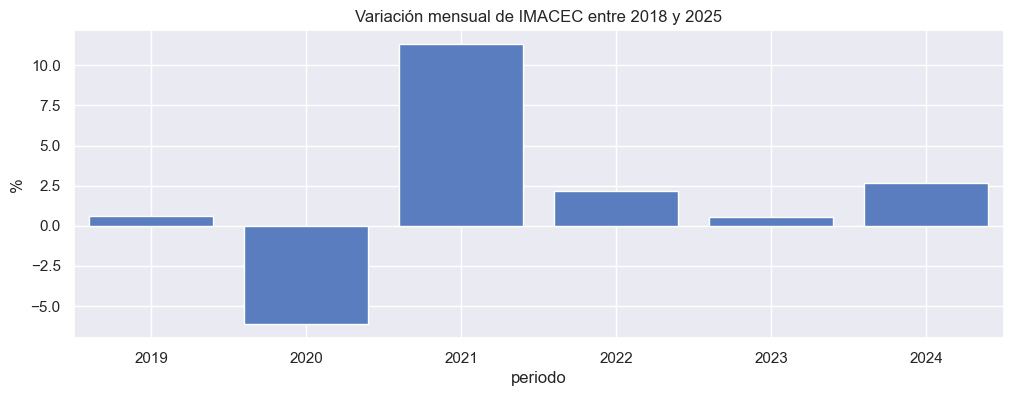

In [ ]:
# Solución de pregunta 4
## Lo mismo que la anterior, solo que con dataframe anual:

# Columna de Variacion
df2['variacion'] = df2['total imacec'].pct_change() * 100
df2

# FIGURA
plt.figure(figsize=(12,4))

# Gráfico
sns.barplot(data=df2[1:], # Me salto primer año
             x='periodo',
             y='variacion')

# Mostrar
plt.title('Variación anual de IMACEC entre 2019 y 2025')
plt.ylabel('%')
plt.grid(True)
plt.show()

##### 5. Grafique un radar plot que compare el IMACEC promedio de 2023 y 2024, donde cada eje del radar represente una variable del IMACEC (comercio, servicios, minería, total, IMACEC no minero).

In [ ]:
# Tu código aquí

###### Solución de la pregunta 5

In [250]:
# Solución de pregunta 5
import plotly.express as px

# Columnas buscadas
target = industrias + ['total imacec', 'imacec no minero']
# Obteniendo nuevo dataframe de interés
df5 = df.copy()
# Obteniendo años
df5['año'] = df5['periodo'].apply(lambda x: x.year)
# Limpiando dataframe
df5.drop(columns=['variacion', 'periodo'], inplace=True)
# Promedio por año
df5 = df5.groupby('año').mean().reset_index()
# Filtros
df5 = df5[df5['año'].isin([2023, 2024])] # Años
df5 = df5[target+['año']] # targets
# Tidy
df5 = df5.melt(id_vars='año', var_name='industria', value_name='imacec')
df5

,año,industria,imacec
0,2023,mineria,85.957649
1,2024,mineria,90.396684
2,2023,industria,101.967863
3,2024,industria,104.770584
4,2023,resto de bienes,104.926930
5,2024,resto de bienes,108.324675
6,2023,comercio,112.281047
7,2024,comercio,118.043537
8,2023,servicios,116.116018
9,2024,servicios,118.408636


In [261]:
# # Crear radar plot
fig = px.line_polar(df5, 
                    r="imacec", 
                    theta="industria", 
                    color="año",
                    line_close=True, 
                    title="Radar plot IMACEC 2023 vs 2024")
fig.update_traces(fill='toself')
fig.show()

##### 6. Grafique en un scatter plot el IMACEC Comercio (eje X), IMACEC Servicios (eje Y), IMACEC Minería (tamaño burbuja) e IMACEC total (color burbujas). Para ello, use los datos de IMACEC mensuales de 2018 a 2024. Use plotly para la visualización.

In [ ]:
# Tu código aquí

###### Solución de la pregunta 6

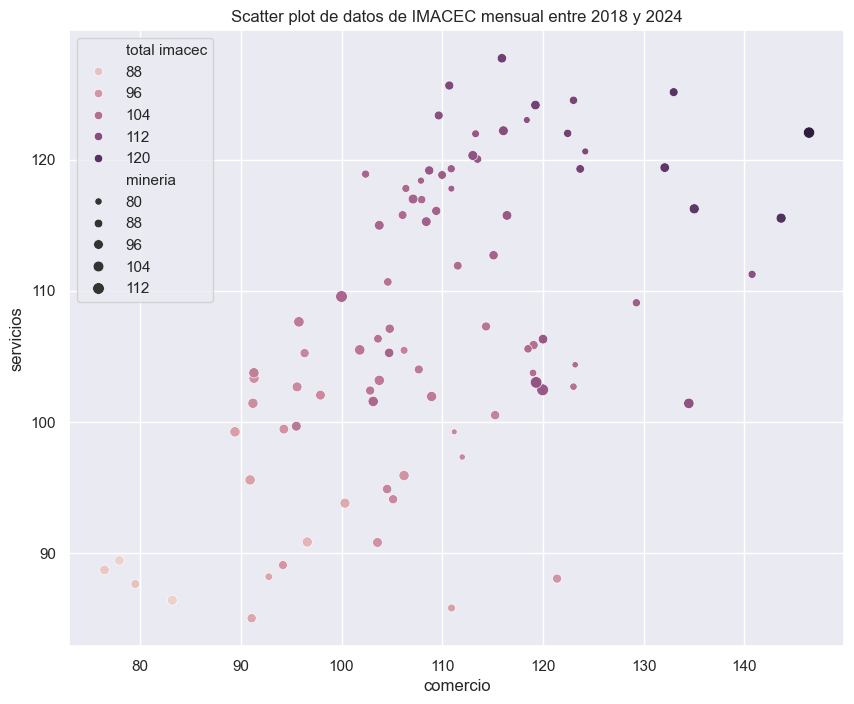

In [274]:
# Solución de pregunta 6

# Solo hasta 2024
df6 = df[df['periodo'].dt.year < 2025]

# FIGURA
plt.figure(figsize=(10,8))

sns.scatterplot(data=df,
                x='comercio',
                y='servicios',
                size='mineria',
                hue='total imacec')

plt.title('Scatter plot de datos de IMACEC mensual entre 2018 y 2024')
plt.show()

##### 7. Calcule la diferencia de IMACEC entre Minería e Industria, y visualice esta diferencia en un gráfico de línea.

In [ ]:
# Tu código aquí

###### Solución de la pregunta 7

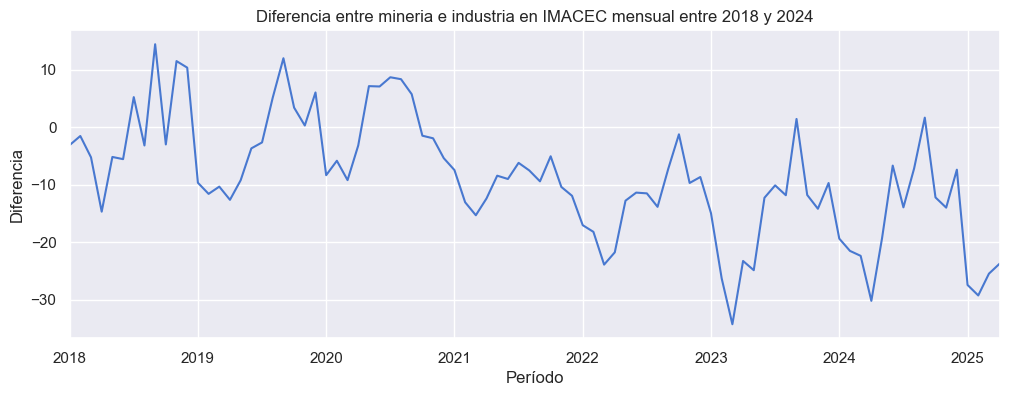

In [284]:
# Solución de pregunta 7
df7 = df.copy()
df7['dif mineria-industria'] = df7['mineria'] - df7['industria']

# FIGURA
df7.plot(x='periodo', 
         y='dif mineria-industria',
         figsize=(12,4),
         legend=False)

plt.xlabel('Período')
plt.ylabel('Diferencia')
plt.title('Diferencia entre mineria e industria en IMACEC mensual entre 2018 y 2024')

plt.show()


##### 8. Reproduzca las etapas necesarias para realizar el mismo gráfico en Seaborn y Plotly.

In [ ]:
# Tu código aquí

###### Solución de la pregunta 8

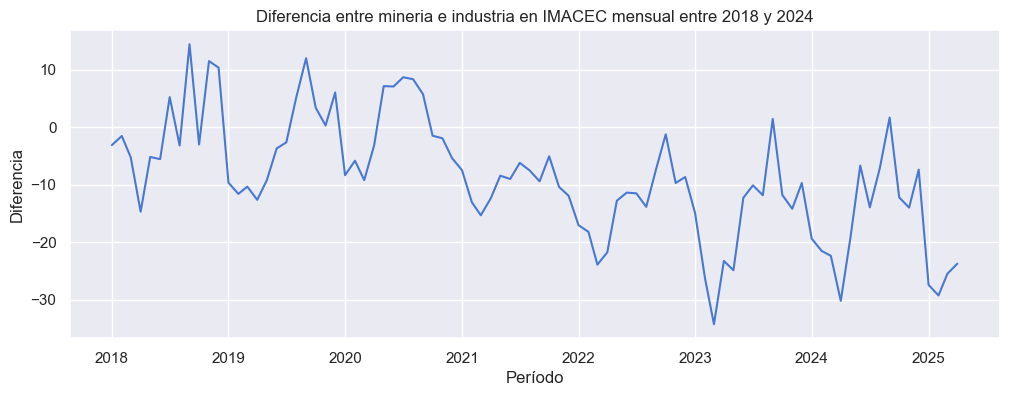

In [285]:
# Solución de pregunta 8

# Seaborn 
plt.figure(figsize=(12,4))

sns.lineplot(data=df7,
             x='periodo',
             y='dif mineria-industria')

plt.xlabel('Período')
plt.ylabel('Diferencia')
plt.title('Diferencia entre mineria e industria en IMACEC mensual entre 2018 y 2024')

plt.show()

In [292]:
# Plotly

fig = px.line(data_frame=df7,
        	  x='periodo',
        	  y='dif mineria-industria',
              title='Diferencia entre mineria e industria en IMACEC mensual entre 2018 y 2024')
fig.show()

##### 9. ¿Es factible usar un Treemap para visualizar este índice? Fundamente su respuesta.

In [ ]:
# Tu código aquí

##### 10. Usando como referencia las visualizaciones realizadas en este Workshop, cree un reporte del Imacec en Figma.

[Link a figma](https://www.figma.com)